In [71]:
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
import pandas as pd
import numpy as np
import tensorflow as tf
from numpy import array
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import  Sequential
from tensorflow.keras.layers import Dense,Flatten,Embedding
from tensorflow.keras.preprocessing.text import text_to_word_sequence

In [79]:
prics=pd.read_csv("../data/di_code.csv")
prics.iloc[:,0]

0     KP345
1     OK163
2     QW987
3     ER203
4     OP167
      ...  
95    FG308
96    JV765
97    QE931
98    TY341
99    WR321
Name: d_code, Length: 100, dtype: object

In [162]:
prics.iloc[:,1]

0      71100
1     123000
2       3500
3      38800
4      68900
       ...  
95     46800
96     24700
97     10500
98     80000
99     95500
Name: price, Length: 100, dtype: int64

In [133]:
with open('../data/di_30.txt', 'r') as f:
    data30 = f.read()
file_list30 = data30.splitlines()
with open('../data/di_40.txt', 'r') as g:
    data40 = g.read()
file_list40 = data40.splitlines()

In [134]:
list30=[]
for i in range(len(file_list30)):
    list30.append(file_list30[i].split(" ")[2:-1])

list40=[]
for i in range(len(file_list40)):
    list40.append(file_list40[i].split(" ")[2:-1])

In [135]:
list30_FG391=[]
for i in range(len(list30)):
    if list30[i][0]=="FG391":
        list30_FG391.append(list30[i])

list40_FG391=[]
for i in range(len(list40)):
    if list40[i][0]=="FG391":
        list40_FG391.append(list40[i])

In [150]:
list_30_40_FG391=list30_FG391+list40_FG391
len(list_30_40_FG391)

200

In [169]:
list_30_40_FG391

[['FG391',
  'PL890',
  'OL766',
  'UY109',
  'CV305',
  'IO789',
  'QA107',
  'QW987',
  'FG371'],
 ['FG391',
  'WO900',
  'WO188',
  'RD201',
  'PL221',
  'KP345',
  'RE397',
  'WR789',
  'PO203',
  'ET650',
  'LO976',
  'KP843',
  'QO304'],
 ['FG391',
  'KG504',
  'GH211',
  'ER203',
  'TR675',
  'QY204',
  'CV305',
  'WD100',
  'FG308',
  'HD433',
  'WD234',
  'TY211',
  'JV765',
  'OK211',
  'SD388',
  'JV765'],
 ['FG391', 'WR321', 'GH791', 'FG371', 'TR109', 'KP345'],
 ['FG391',
  'KP321',
  'JV765',
  'HK377',
  'PL250',
  'JV765',
  'WR117',
  'HD433',
  'CV305',
  'TR675',
  'KG341',
  'UY503',
  'QO743',
  'WO378'],
 ['FG391',
  'HK377',
  'TR109',
  'SF108',
  'GH433',
  'HK504',
  'CV305',
  'KP843',
  'GH791',
  'KG341',
  'HK504',
  'QA107',
  'RE397',
  'QE277',
  'OP350',
  'ER203',
  'FG308',
  'ET650'],
 ['FG391',
  'ZA780',
  'RE577',
  'WO900',
  'GH700',
  'OK163',
  'OL766',
  'GH211',
  'TR675'],
 ['FG391',
  'WR896',
  'WO188',
  'LO103',
  'ER203',
  'HK377',
  

In [151]:
# 토큰화 
token_list_30_40_FG391 = Tokenizer()
token_list_30_40_FG391.fit_on_texts(list_30_40_FG391)
print(len(token_list_30_40_FG391.word_index))

100


In [152]:
x30_40 = token_list_30_40_FG391.texts_to_sequences(list_30_40_FG391)
print(x30_40)

[[1, 36, 50, 9, 59, 11, 41, 51, 22], [1, 42, 66, 19, 67, 20, 43, 68, 28, 100, 91, 5, 60], [1, 2, 97, 6, 29, 12, 59, 79, 44, 30, 31, 32, 23, 52, 37, 23], [1, 69, 10, 22, 45, 20], [1, 84, 23, 3, 33, 23, 70, 30, 59, 29, 13, 24, 14, 7], [1, 3, 45, 46, 15, 85, 59, 5, 10, 13, 85, 41, 43, 53, 47, 6, 44, 100], [1, 86, 73, 42, 92, 54, 50, 97, 29], [1, 38, 66, 80, 6, 3, 33, 24, 42], [1, 51, 13, 48, 98, 71, 50], [1, 2, 52, 19, 16, 96, 11, 79, 44, 87, 16, 53, 6, 55, 28, 66, 43, 3, 81, 25, 85], [1, 41, 84, 17, 28, 19], [1, 71, 9, 81, 61, 96, 1, 9, 4, 16, 85, 21], [1, 56, 51, 74, 60, 7, 26, 1, 39, 18, 39, 88, 44, 41, 84, 29, 59, 59], [1, 11, 89, 6, 29, 85, 36, 45, 95, 91, 95, 73, 29, 45, 2, 81, 24, 27, 3, 75, 99, 38, 90], [1, 33, 8, 38, 40, 42, 22, 93, 82, 47, 82, 62, 21, 60, 11, 19, 28, 57, 4, 68], [1, 79, 58, 36, 6, 40, 84, 12, 33, 48, 47, 20, 13, 81, 94, 10, 60], [1, 51, 79, 91, 63, 3, 32, 83, 31, 76, 43, 13, 9, 12, 45, 53, 28, 18, 24], [1, 44, 6, 61, 98, 5, 6, 79, 29, 4, 26, 58, 10, 4, 31], [1, 

In [153]:
a=15
for i in range(len(x30_40)):
    if len(x30_40[i])>a:
        a=len(x30_40[i])
    else:
        a=a

In [154]:
a #35하면 원핫인코딩의 문제점이 발생할 수 있으므로 최대한 0을줄이기위해 개수를 찾아봄

25

In [155]:
padded_x30_40 = pad_sequences(x30_40, 25)  # 서로 다른 길이의 데이터를 25로 맞추기
print(padded_x30_40)

[[ 0  0  0 ... 41 51 22]
 [ 0  0  0 ... 91  5 60]
 [ 0  0  0 ... 52 37 23]
 ...
 [ 0  0  0 ... 43 35 49]
 [ 0  0  0 ... 68 20  7]
 [ 0  0  0 ... 40  5 15]]


In [156]:
word_size = len(token_list_30_40_FG391.word_index) +1

#질병을 가진  사람의 병원비의 총합

In [185]:
pay=[]
for j in range(len(list_30_40_FG391)):
    pay.append(sum([prics.loc[prics["d_code"]==i,"price"].values[0] for i in list_30_40_FG391[j]]))    

In [239]:
pay_DF=pd.DataFrame(pay)
pay_DF.head(3)

,0
0,386700
1,496900
2,706300


In [195]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
X_train, X_test, y_train, y_test = train_test_split(padded_x30_40, array(pay_DF), test_size = 0.2, random_state = 0)
scaler = StandardScaler()
y_train_scaler = scaler.fit_transform(y_train.reshape(-1, 1))
y_test_scaler = scaler.transform(y_test.reshape(-1, 1))

In [220]:
X_train.shape

(160, 25)

In [235]:
#모델 설정
model = Sequential()
model.add(Embedding(160, 25))
model.add(LSTM(50, activation='tanh'))
model.add(Dense(1))
model.compile(loss = 'mean_squared_error',
              optimizer = 'adam')

history = model.fit(X_train, y_train_scaler, batch_size = 100, epochs = 100, validation_split=0.2)

Epoch 1/100
2/2 [==============================] - 0s 148ms/step - loss: 1.0691 - val_loss: 0.7156
Epoch 2/100
2/2 [==============================] - 0s 17ms/step - loss: 1.0605 - val_loss: 0.7091
Epoch 3/100
2/2 [==============================] - 0s 17ms/step - loss: 1.0509 - val_loss: 0.7031
Epoch 4/100
2/2 [==============================] - 0s 17ms/step - loss: 1.0411 - val_loss: 0.6944
Epoch 5/100
2/2 [==============================] - 0s 18ms/step - loss: 1.0278 - val_loss: 0.6811
Epoch 6/100
2/2 [==============================] - 0s 17ms/step - loss: 1.0100 - val_loss: 0.6622
Epoch 7/100
2/2 [==============================] - 0s 18ms/step - loss: 0.9853 - val_loss: 0.6347
Epoch 8/100
2/2 [==============================] - 0s 17ms/step - loss: 0.9484 - val_loss: 0.5934
Epoch 9/100
2/2 [==============================] - 0s 17ms/step - loss: 0.8962 - val_loss: 0.5325
Epoch 10/100
2/2 [==============================] - 0s 17ms/step - loss: 0.8158 - val_loss: 0.4469
Epoch 11/100
2/2 [

Epoch 84/100
2/2 [==============================] - 0s 19ms/step - loss: 0.0073 - val_loss: 0.1279
Epoch 85/100
2/2 [==============================] - 0s 21ms/step - loss: 0.0073 - val_loss: 0.1230
Epoch 86/100
2/2 [==============================] - 0s 18ms/step - loss: 0.0068 - val_loss: 0.1205
Epoch 87/100
2/2 [==============================] - 0s 17ms/step - loss: 0.0071 - val_loss: 0.1224
Epoch 88/100
2/2 [==============================] - 0s 17ms/step - loss: 0.0064 - val_loss: 0.1259
Epoch 89/100
2/2 [==============================] - 0s 16ms/step - loss: 0.0069 - val_loss: 0.1207
Epoch 90/100
2/2 [==============================] - 0s 16ms/step - loss: 0.0058 - val_loss: 0.1172
Epoch 91/100
2/2 [==============================] - 0s 16ms/step - loss: 0.0072 - val_loss: 0.1170
Epoch 92/100
2/2 [==============================] - 0s 16ms/step - loss: 0.0056 - val_loss: 0.1224
Epoch 93/100
2/2 [==============================] - 0s 16ms/step - loss: 0.0069 - val_loss: 0.1194
Epoch 94/1

In [236]:
print("\nTest Accuracy: %.4f" % (model.evaluate(X_test, y_test_scaler)))

2/2 [==============================] - 0s 1ms/step - loss: 0.0990

Test Accuracy: 0.0990


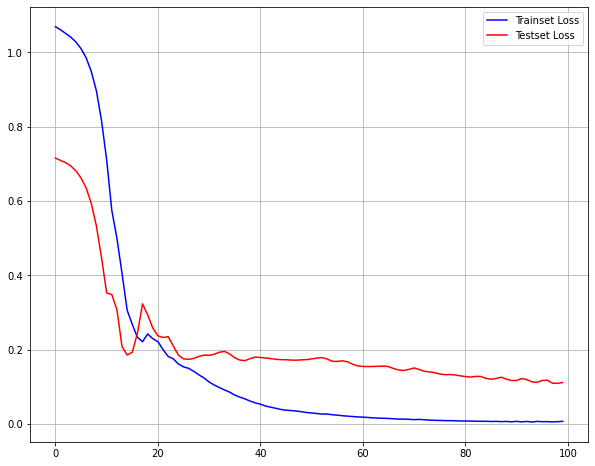

In [238]:
import matplotlib.pyplot as plt
y_loss = history.history['loss']
y_vloss = history.history['val_loss']

epoch_len = range(len(y_loss))
plt.figure(figsize = (10,8))
plt.plot(epoch_len, y_loss, color = 'blue', label = 'Trainset Loss')
plt.plot(epoch_len, y_vloss, color = 'red', label = 'Testset Loss')
plt.legend()
plt.grid()
plt.show()